In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from IPython.display import SVG, Image

ModuleNotFoundError: No module named 'tensorflow'

In [2]:

# For checking out that how many images are available in the train set we can use import OS
for types in os.listdir("train/"):
    print(str(len(os.listdir("train/"+ types)))+" "+ types+' images')

2016 Apple___Apple_scab images
1987 Apple___Black_rot images
1760 Apple___Cedar_apple_rust images
2008 Apple___healthy images
1816 Blueberry___healthy images
1826 Cherry_(including_sour)___healthy images
1683 Cherry_(including_sour)___Powdery_mildew images
1642 Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot images
1907 Corn_(maize)___Common_rust_ images
1859 Corn_(maize)___healthy images
1908 Corn_(maize)___Northern_Leaf_Blight images
1888 Grape___Black_rot images
1920 Grape___Esca_(Black_Measles) images
1692 Grape___healthy images
1722 Grape___Leaf_blight_(Isariopsis_Leaf_Spot) images
2010 Orange___Haunglongbing_(Citrus_greening) images
1838 Peach___Bacterial_spot images
1728 Peach___healthy images
1913 Pepper,_bell___Bacterial_spot images
1988 Pepper,_bell___healthy images
1939 Potato___Early_blight images
1824 Potato___healthy images
1939 Potato___Late_blight images
1781 Raspberry___healthy images
2022 Soybean___healthy images
1736 Squash___Powdery_mildew images
1824 Strawberry_

In [5]:

# Complete Dataset images can be loaded using ImageDataGenerator function
img_size=48
batch_size=64
datagen_train=ImageDataGenerator(horizontal_flip=True)
train_generator=datagen_train.flow_from_directory("train",
target_size=(img_size,img_size),
batch_size=batch_size,
class_mode='categorical',
shuffle=True)

datagen_test=ImageDataGenerator(horizontal_flip=True)
validation_generator=datagen_test.flow_from_directory("val",
target_size=(img_size,img_size),
batch_size=batch_size,
class_mode='categorical',
shuffle=True)

NameError: name 'ImageDataGenerator' is not defined

In [19]:
detection=Sequential()

#1 -convolutional layer-1
detection.add(Conv2D(64,(3,3),padding='same',input_shape=(48,48,3)))
detection.add(BatchNormalization())
detection.add(Activation('relu'))
detection.add(MaxPooling2D(pool_size=(2,2)))
detection.add(Dropout(0.25))

#2 -convolutional layer-2
detection.add(Conv2D(128,(5,5),padding='same'))
detection.add(BatchNormalization())
detection.add(Activation('relu'))
detection.add(MaxPooling2D(pool_size=(2,2)))
detection.add(Dropout(0.25))

#3 -convolutional layer-3
detection.add(Conv2D(512,(3,3),padding='same'))
detection.add(BatchNormalization())
detection.add(Activation('relu'))
detection.add(MaxPooling2D(pool_size=(2,2)))
detection.add(Dropout(0.25))

#4 -convolutional layer-4
detection.add(Conv2D(1024,(3,3),padding='same'))
detection.add(BatchNormalization())
detection.add(Activation('relu'))
detection.add(MaxPooling2D(pool_size=(2,2)))
detection.add(Dropout(0.25))

detection.add(Flatten())
detection.add(Dense(256))
detection.add(BatchNormalization())
detection.add(Activation('relu'))
detection.add(Dropout(0.25))

detection.add(Dense(512))
detection.add(BatchNormalization())
detection.add(Activation('relu'))
detection.add(Dropout(0.25))

detection.add(Dense(39,activation='softmax'))
optimum=Adam(lr=0.005)
detection.compile(optimizer=optimum,loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
detection.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 48, 48, 64)        1792      
_________________________________________________________________
batch_normalization_18 (Batc (None, 48, 48, 64)        256       
_________________________________________________________________
activation_18 (Activation)   (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_19 (Batc (None, 24, 24, 128)      

In [ ]:
ephocs=10
steps_per_epoch=train_generator.n//train_generator.batch_size
steps_per_epoch
validation_steps=validation_generator.n//validation_generator.batch_size
validation_steps
detection.fit(x=train_generator,
                    steps_per_epoch=steps_per_epoch,
                    epochs=ephocs,
                    validation_data=validation_generator,
                    validation_steps=validation_steps)
detection.save('auto_chloro_model.h5')

Epoch 1/50
 19/687 [..............................] - ETA: 28:46 - loss: 3.5192 - accuracy: 0.1544

'Tomato_Bacterial_spot'

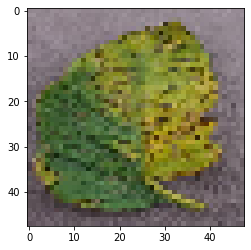

In [8]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

test_img=image.load_img("tbs.JPG",target_size=(48,48))
plt.imshow(test_img)
test_img=image.img_to_array(test_img)
test_img=np.expand_dims(test_img,axis=0)
result=detection.predict(test_img)
a=result.argmax()
classes=train_generator.class_indices
category=[]
for i in classes:
          category.append(i)
for i in range(len(classes)):
           if(i==a):
                output=category[i]
output  